In [19]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
#experiment_dir = '/Users/madisonvanhorn/mlpractical/mlpractical-mlp2020-21-coursework_2'
experiment_dir = '/Users/madisonvanhorn/gcloud_results/data/'

In [20]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('/')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [67]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
for key, value in result_dict.items():
    print(key, list(value.keys()))

seed3 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
seed2 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
batchsize_512 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
learningrate_005 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
batchsize_100 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
learningrate_05 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
seed1 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
batchsize_256 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
learningrate_001 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
batchsize_128 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
weightdecay_0001 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
weightdecay_001 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
learningrate_01 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
weightdecay_1 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
weightdecay_00001 ['train_acc', 'train_loss', 'val_acc', 'val_loss']


In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    plt.title('Weight Decay Training and Validation Loss for VGG38')
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_1.legend(loc=0, fontsize='small')
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    plt.title('Weight Decay Training and Validation Accuracy for VGG38')
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_2.legend(loc=0, fontsize='small')
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('/Users/madisonvanhorn/gcloud_results/data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('/Users/madisonvanhorn/gcloud_results/data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    

/Users/madisonvanhorn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/Users/madisonvanhorn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


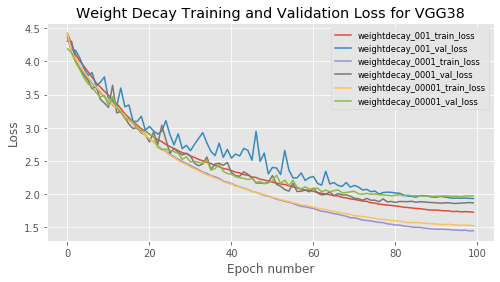

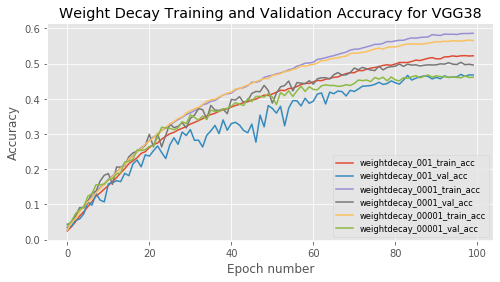

In [77]:
#plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38', 'bn_1'])
plot_result_graphs('problem_model', result_dict, keys_to_plot=['weightdecay_001', 'weightdecay_0001','weightdecay_00001',])